(100, 120) 50


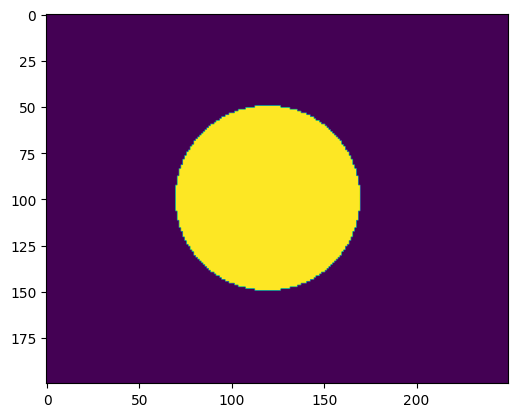

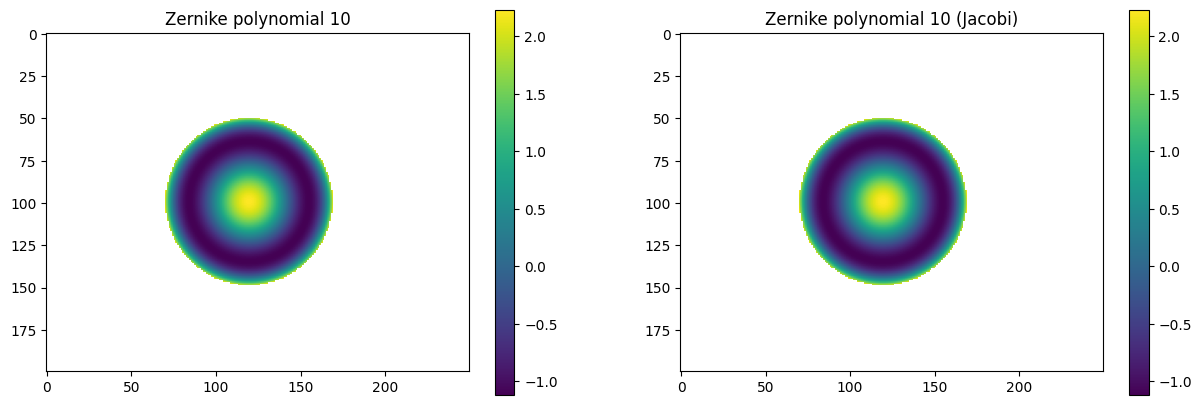

In [1]:
import matplotlib.pyplot as plt
from arte.types.mask import CircularMask
from arte.utils.zernike_generator import ZernikeGenerator
import numpy as np
cm = CircularMask((200,250),50,(100,120))
plt.figure()
plt.imshow(cm.mask()* -1 +1)
nzern = 36
zz = ZernikeGenerator(cm)
print(zz.center(), zz.radius())
zern_cube = np.rollaxis(np.ma.masked_array([zz.getZernike(n) for n in range(1,nzern+1)]),0,3)
zz2 = ZernikeGenerator(cm, useJacobi=True)
zern_cube2 = np.rollaxis(np.ma.masked_array([zz2.getZernike(n) for n in range(1,nzern+1)]),0,3)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(zern_cube[:,:,10])
plt.title('Zernike polynomial 10')
plt.colorbar()
plt.subplot(122)
plt.imshow(zern_cube2[:,:,10])
plt.title('Zernike polynomial 10 (Jacobi)')
plt.colorbar()
plt.show()

In [2]:
c_wf = np.random.rand(nzern)
wf =  np.ma.masked_array(zern_cube @ c_wf, mask=cm.mask())
zern_cube_compressed = np.array([zern_cube[:,:,n].compressed() for n in range(0,nzern)]).T
zrec = np.linalg.pinv(zern_cube_compressed)
coeffs = zrec @ wf.compressed()
print("Normalized RMS: %g " % np.sqrt(np.sum((coeffs-c_wf)**2)/len(coeffs)))


Normalized RMS: 1.98532e-15 


In [3]:
from arte.utils.modal_decomposer import ModalDecomposer
from arte.types.wavefront import Wavefront

#cm_ma = np.ma.masked_array(np.ones((200,250)),mask=cm.mask())
#cmask = CircularMask.fromMaskedArray(cm_ma)

nzern2fit = 36
mdc = ModalDecomposer(nzern2fit)
mdcj = ModalDecomposer(nzern2fit, useJacobi=True)
coeffs2 = mdcj.measureZernikeCoefficientsFromWavefront(Wavefront(wf.data), cm, cm).toNumpyArray()
coeffs1 = mdc.measureZernikeCoefficientsFromWavefront(Wavefront(wf.data), cm, cm).toNumpyArray()
print("Normalized RMS: %g " % np.sqrt(np.sum((coeffs2-c_wf)**2)/len(coeffs)))

/var/folders/fw/h7xkw0_50cv05gx0fcpxkfzc0000gn/T/ipykernel_30865/4154576442.py:8: DeprecationWarning: ModalDecomposer will be deprecated or change use. Use ZernikeModalDecomposer instead
  mdc = ModalDecomposer(nzern2fit)
/var/folders/fw/h7xkw0_50cv05gx0fcpxkfzc0000gn/T/ipykernel_30865/4154576442.py:9: DeprecationWarning: ModalDecomposer will be deprecated or change use. Use ZernikeModalDecomposer instead
  mdcj = ModalDecomposer(nzern2fit, useJacobi=True)


Normalized RMS: 0.377589 


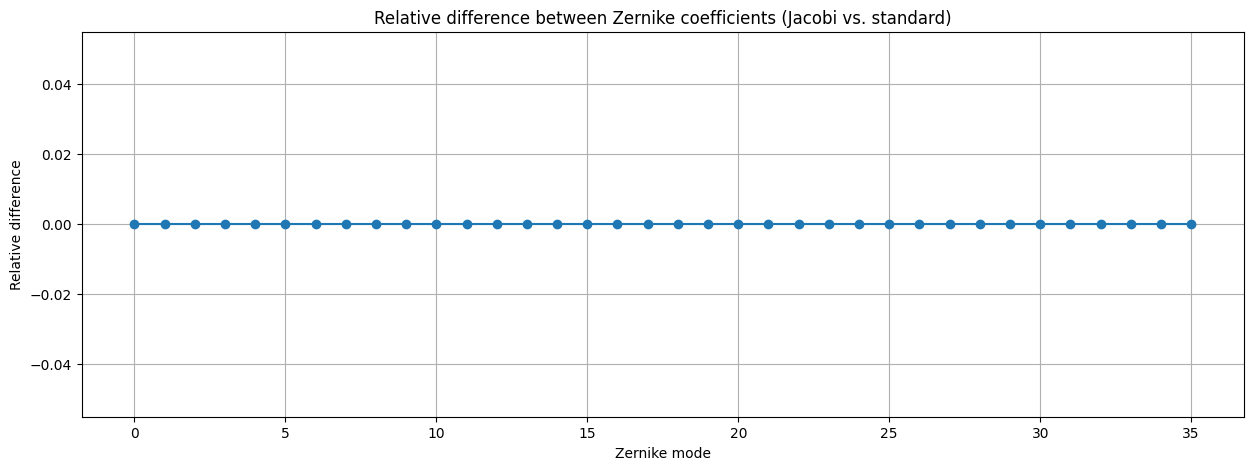

In [ ]:
plt.figure(figsize=(15,5))
plt.plot((coeffs1-coeffs2)/np.abs(coeffs1), '-o')
plt.title('Relative difference between Zernike coefficients (Jacobi vs. standard)')
plt.xlabel('Zernike mode')
plt.ylabel('Relative difference')
plt.grid()
plt.show()

In [7]:

print((coeffs1-coeffs2)/np.abs(coeffs1))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


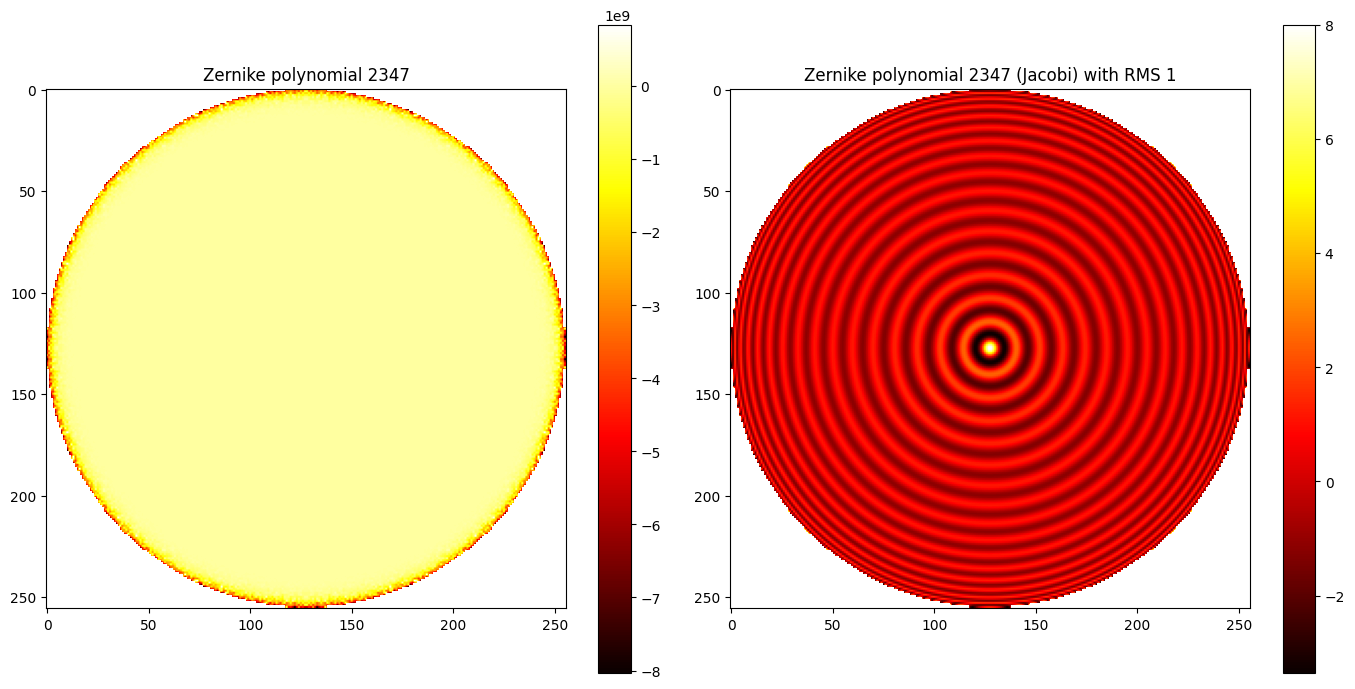

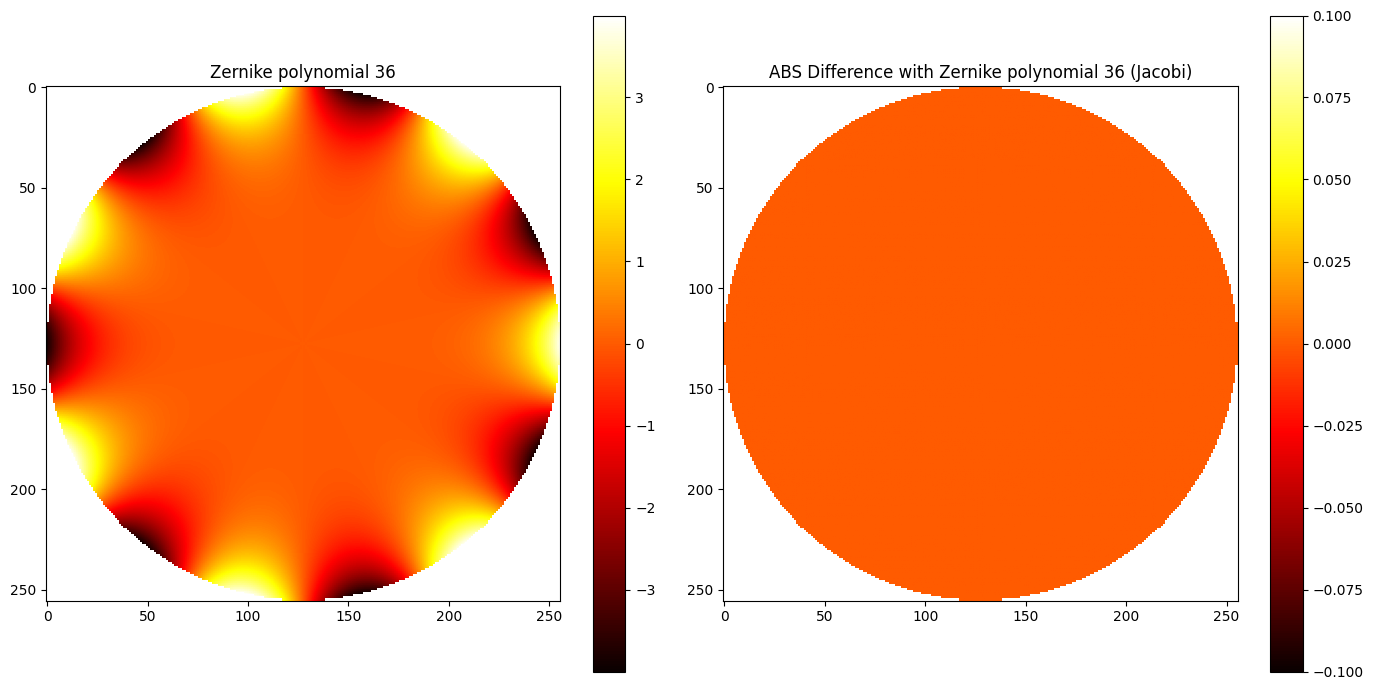

Max/Min absolute difference: 0 / 0


In [6]:
zzj = ZernikeGenerator(CircularMask((256,256)), useJacobi=True)
zzf = ZernikeGenerator(CircularMask((256,256)), useJacobi=False)
n=2347
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(zzf.getZernike(n), cmap='hot' )
plt.colorbar()
plt.title('Zernike polynomial %d' % n)
plt.subplot(122)
plt.imshow(zzj.getZernike(n), cmap='hot' )
plt.colorbar()
plt.title('Zernike polynomial %d (Jacobi) with RMS %d' % (n, zzj.getZernike(n).std()))
plt.tight_layout()
plt.show()

n=36
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(zzf.getZernike(n), cmap='hot' )
plt.colorbar()
plt.title('Zernike polynomial %d' % n)
plt.subplot(122)
plt.imshow(np.abs(zzj.getZernike(n)-zzf.getZernike(n)), cmap='hot' )
plt.colorbar()
plt.title('ABS Difference with Zernike polynomial %d (Jacobi)' % n)
plt.tight_layout()
plt.show()


print("Max/Min absolute difference: %g / %g" % (np.max(np.abs(zzj.getZernike(n)-zzf.getZernike(n))), np.min(np.abs(zzj.getZernike(n)-zzf.getZernike(n)))))